# Imports

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams['image.cmap'] = 'gray'

# What is NumPy

[![numpy](media\numpy.png)](https://numpy.org/)

# Generators

## Deterministic

### Standard

In [88]:
classic = list(range(10))
classic

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [97]:
np.array(classic)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Multidimensional

In [27]:
multi = np.array([arr for _ in range(20)])
multi.shape

(20, 10)

In [28]:
multi_3d = np.array([multi for _ in range(3)])
multi_3d.shape

(3, 20, 10)

### Types

In [98]:
arr.dtype

dtype('int32')

![dtypes](media\dtypes.png)

In [114]:
arr.astype(np.int8), np.array(arr, dtype=np.int8)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8))

In [118]:
np.arange(120, 130).astype(np.int8)

array([ 120,  121,  122,  123,  124,  125,  126,  127, -128, -127],
      dtype=int8)

### Special

In [132]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [136]:
np.zeros(10), np.zeros((5, 5))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]))

In [134]:
np.ones(10), np.ones((5, 5))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [150]:
np.eye(5, 4, -1)

array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

#### Exercise: Gradient image

In [63]:
col = np.arange(200)
gradient = np.array([row * col for row in range(100)])
gradient.shape

(100, 200)

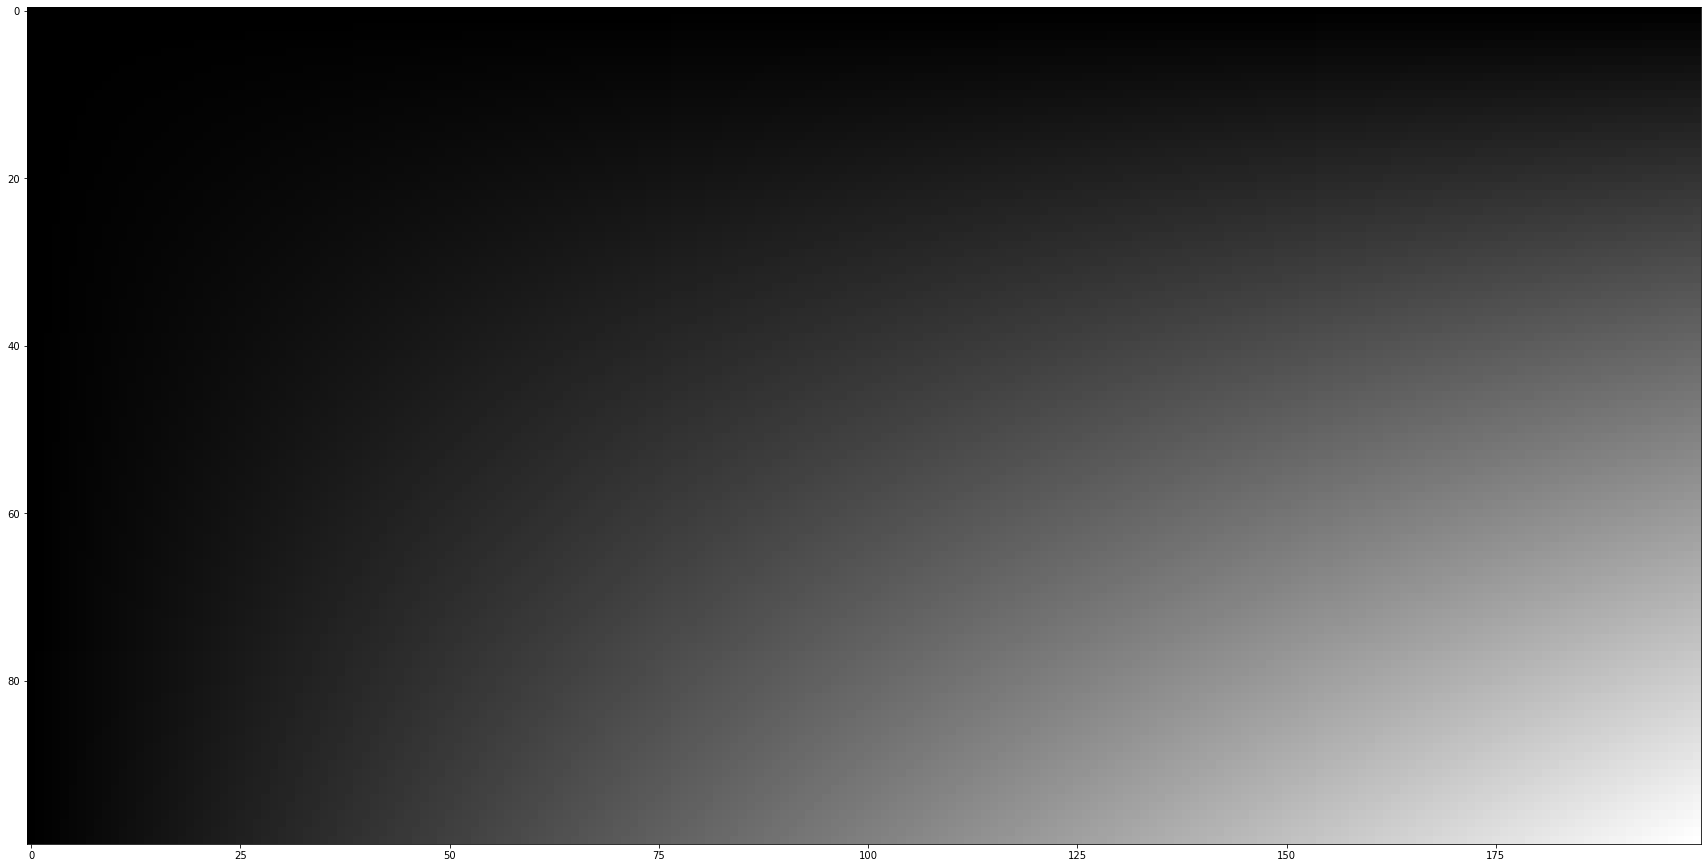

In [64]:
plt.imshow(gradient)

## Random

In [151]:
np.random.rand()

0.4637300629099994

In [158]:
np.random.rand(4, 3, 2)

array([[[0.44528784, 0.64368913],
        [0.57489658, 0.5430833 ],
        [0.00653201, 0.65777345]],

       [[0.23424879, 0.21112113],
        [0.3430816 , 0.96778127],
        [0.00883908, 0.66369232]],

       [[0.29516422, 0.69267396],
        [0.47222937, 0.48526975],
        [0.82600224, 0.31375296]],

       [[0.72280924, 0.04182318],
        [0.76629383, 0.72564554],
        [0.31018132, 0.42900311]]])

In [165]:
np.random.randint(0, 10, (2, 3))

array([[9, 0, 2],
       [3, 6, 8]])

In [8]:
unif = np.random.uniform(0, 1, (100, 200))
unif.shape

(100, 200)

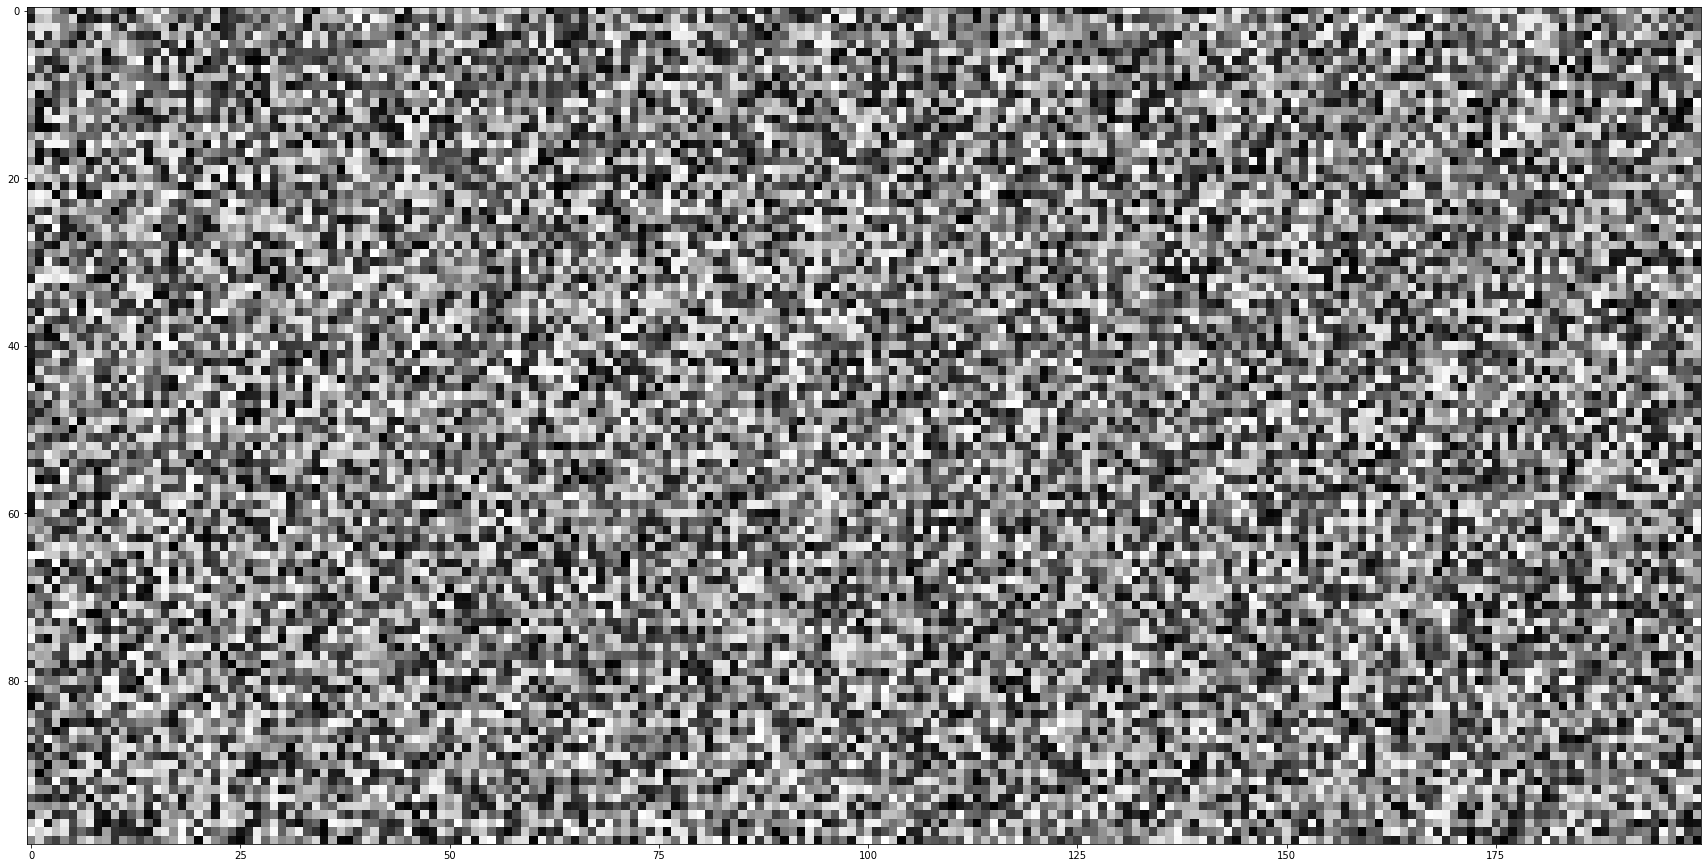

In [57]:
plt.imshow(unif)

In [17]:
normal = 2 * np.random.randn(100, 200) + 1
normal.shape

(100, 200)

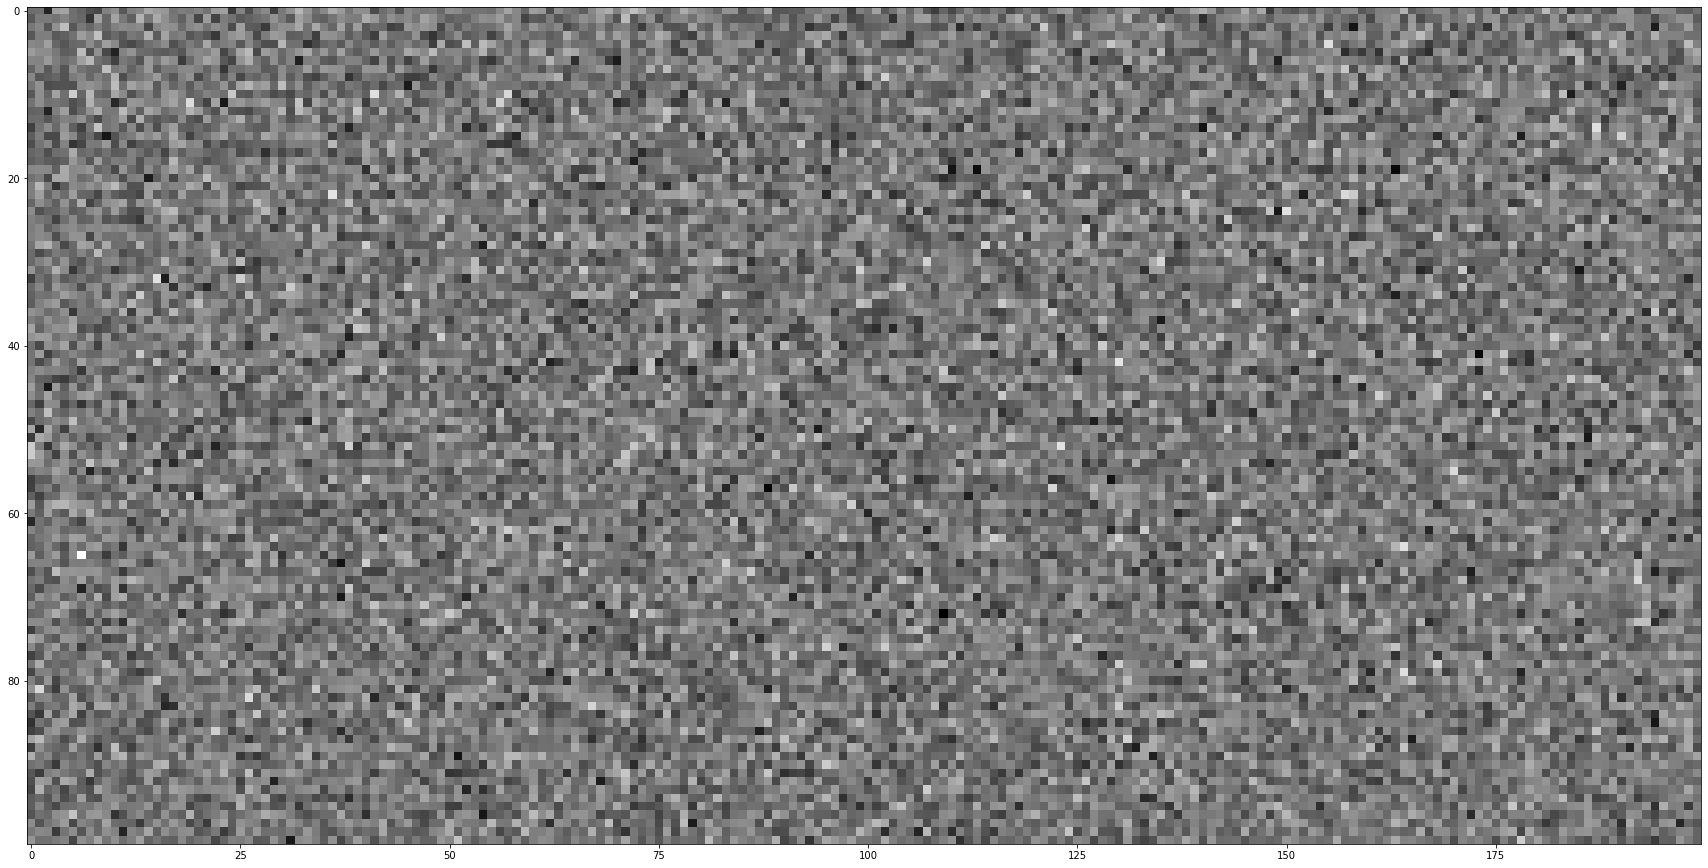

In [58]:
plt.imshow(normal)

#### Exercise: Random color gradient

![rgb](media\rgb.png)

In [78]:
random_color = np.random.uniform(0, 1, 3)
random_color.shape

(3,)

In [79]:
random_gradient = np.array([[random_color * intensity for intensity in column] for column in gradient])
random_gradient.shape

(100, 200, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


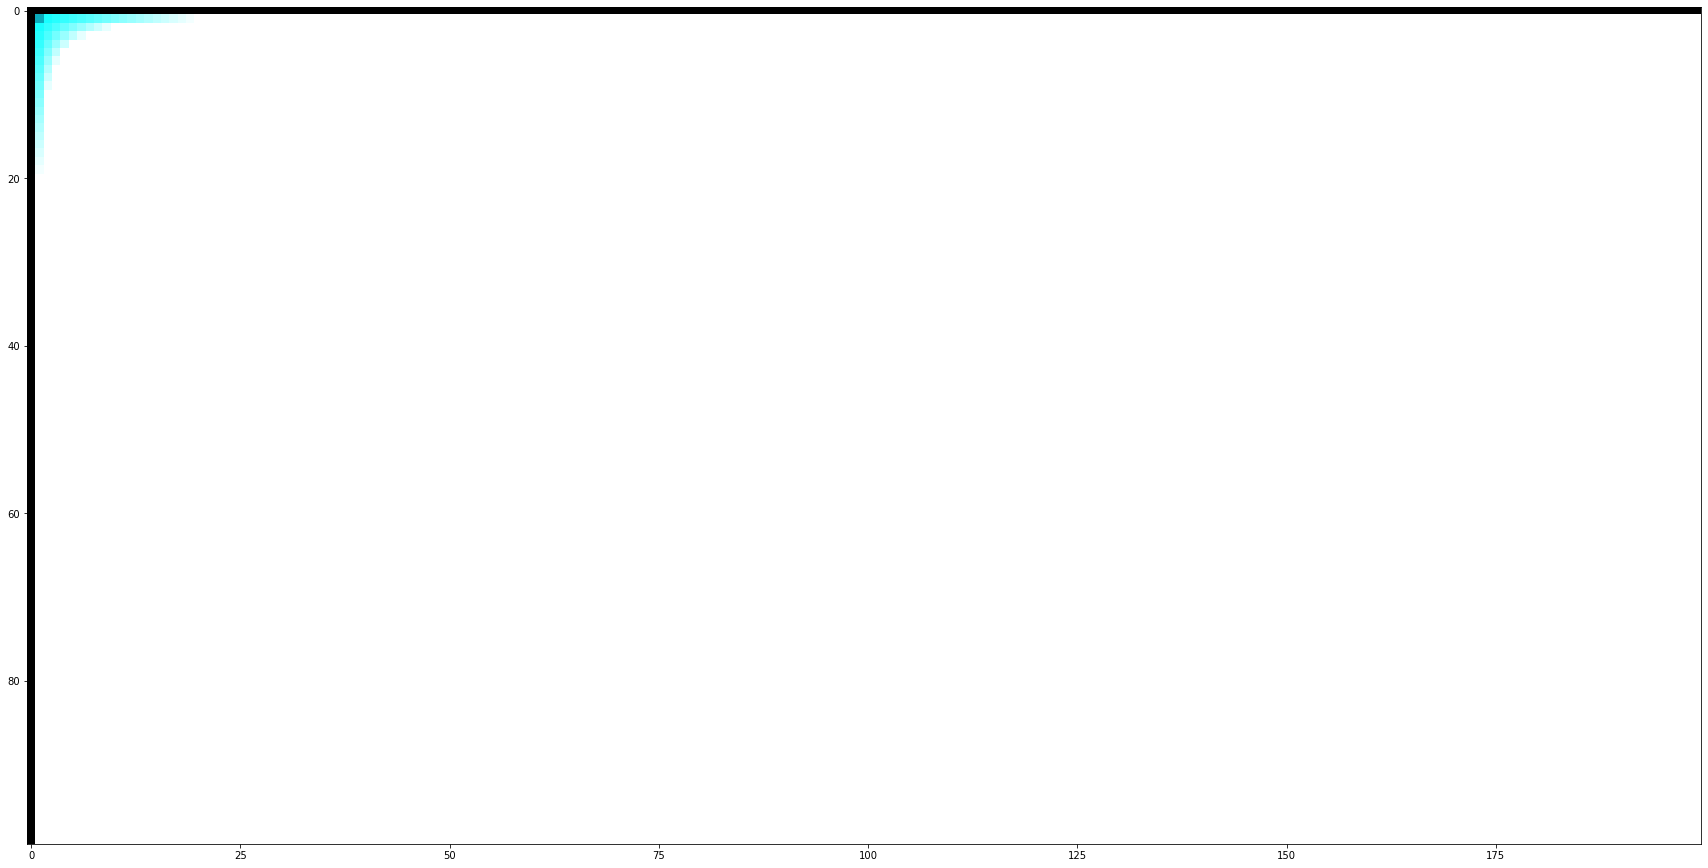

In [80]:
plt.imshow(random_gradient)

Min-max scaling
$$\widetilde{x}=\frac{x-\min{x}}{\max{x}-\min{x}}$$

In [81]:
min_max = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
scaled_gradient = min_max(random_gradient)

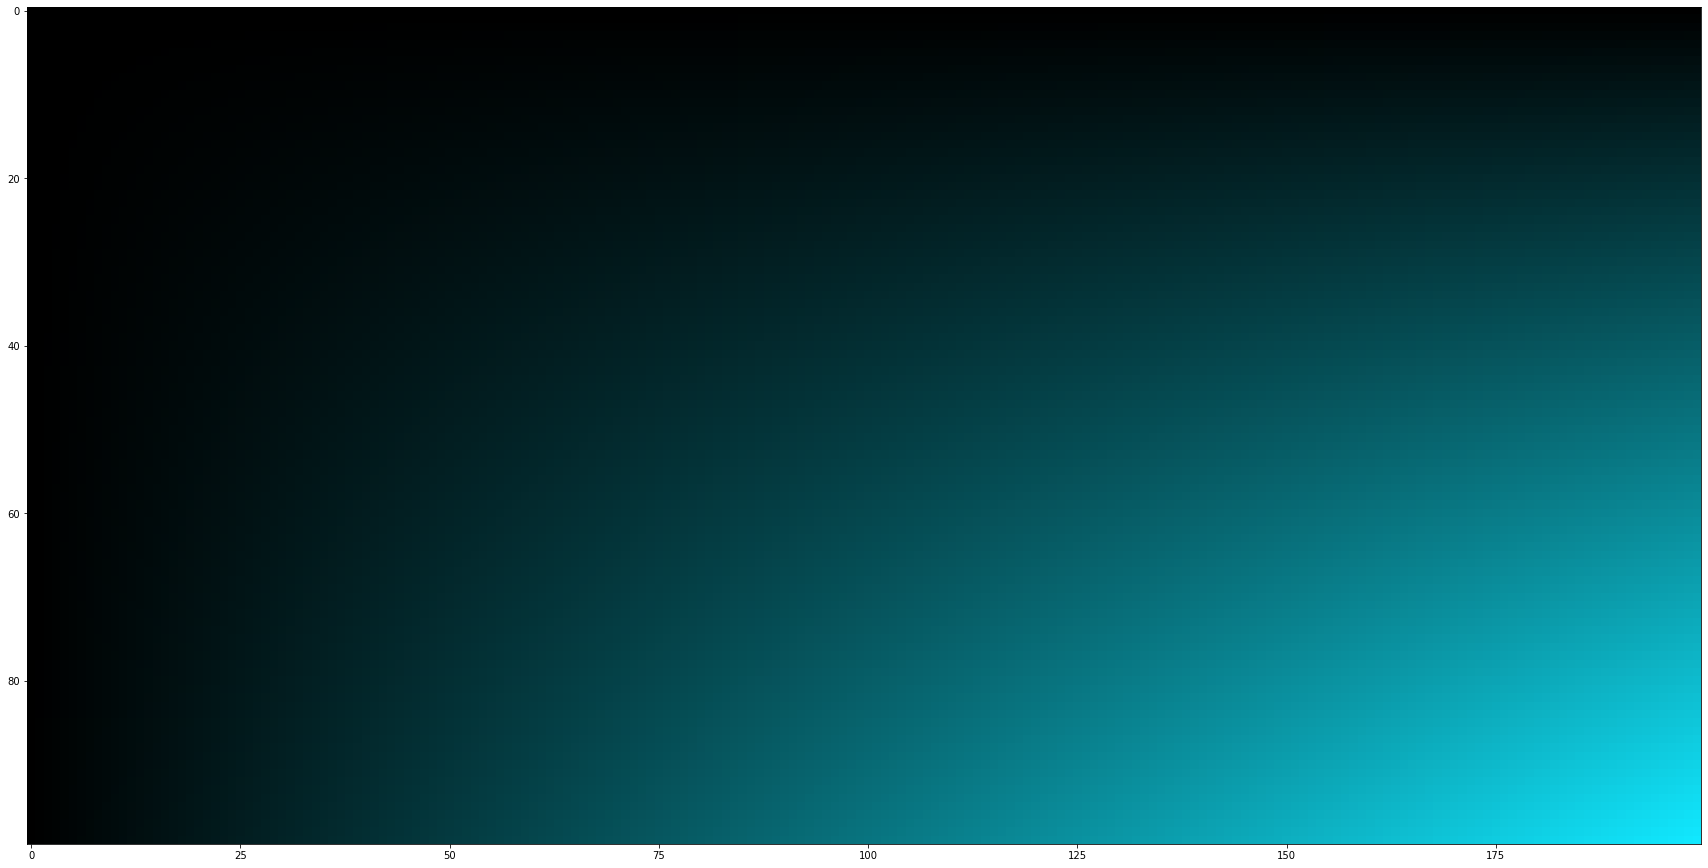

In [82]:
plt.imshow(scaled_gradient)

# Shapes

In [84]:
path = os.path.join('media', 'DIY.jpg')

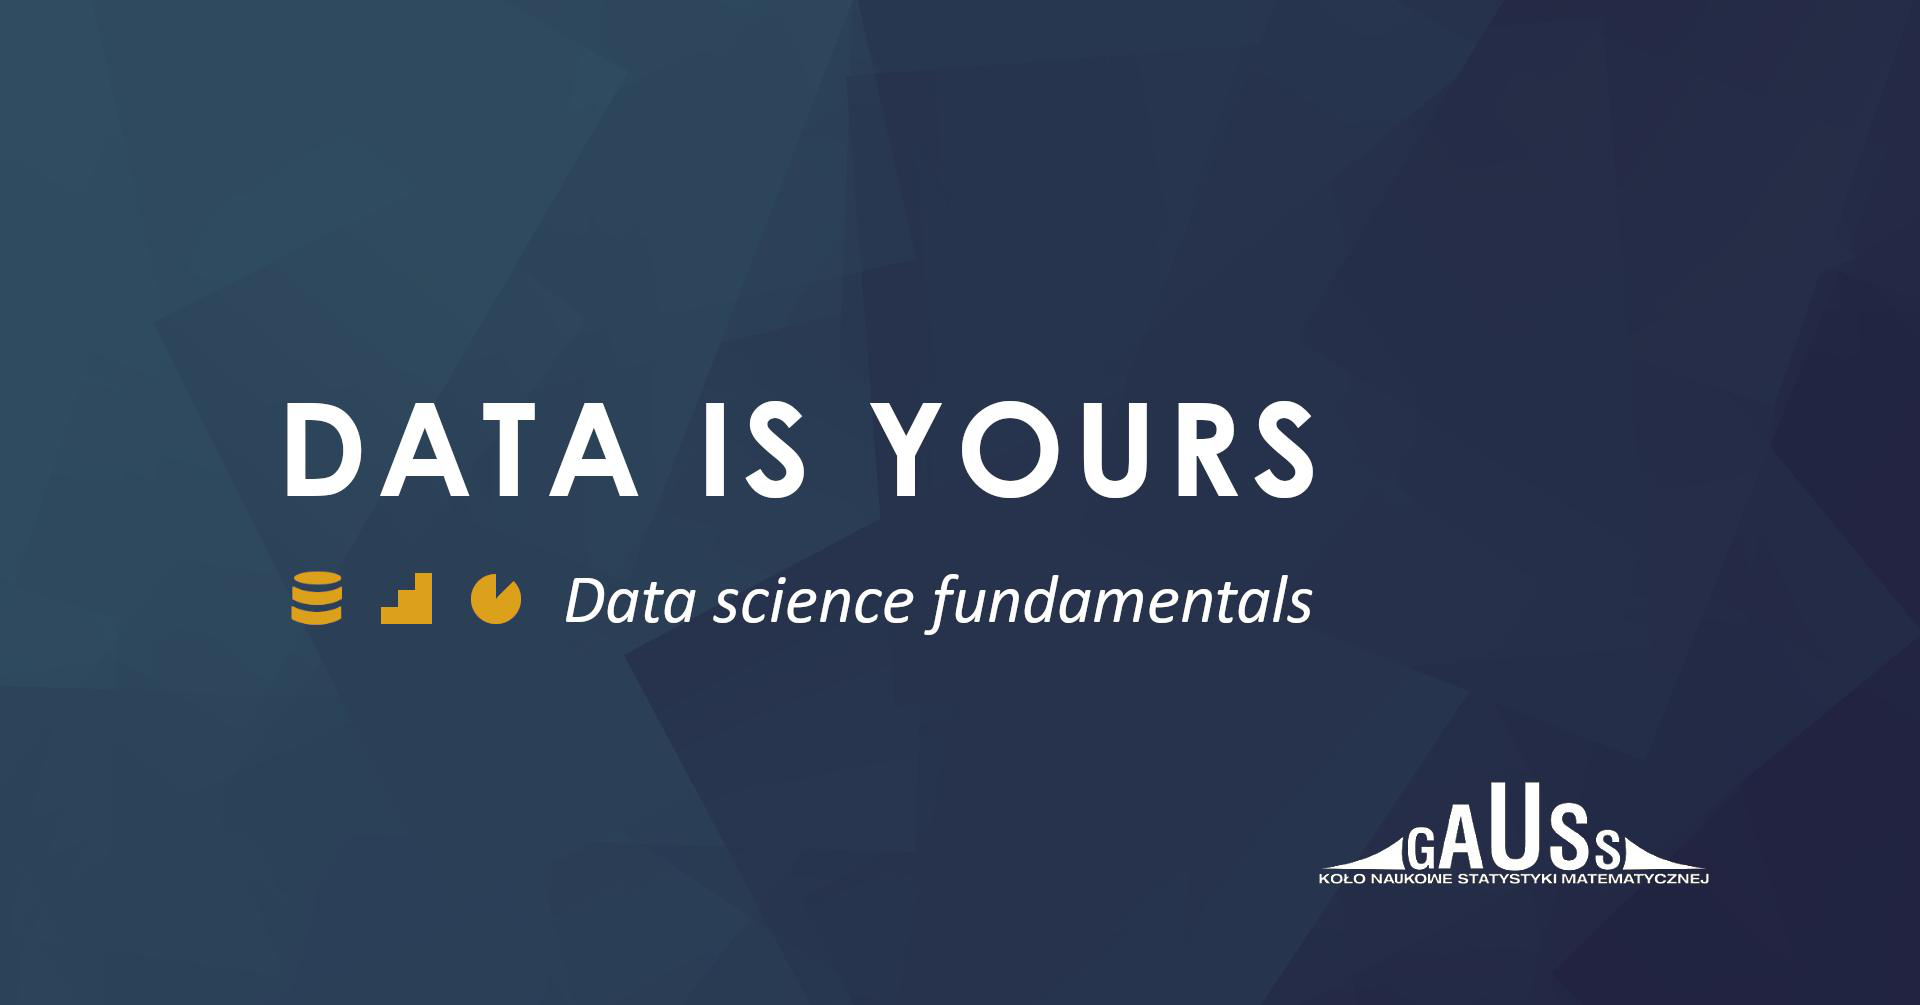

In [87]:
image = Image.open(path)
image

In [89]:
image_array = np.array(image)
image_array.shape

(1005, 1920, 3)

## Reshaping

In [90]:
transposed_image = image_array.T
transposed_image.shape

(3, 1920, 1005)

In [98]:
transposed_image = np.transpose(image_array, (1, 0, 2))
transposed_image.shape

(1920, 1005, 3)

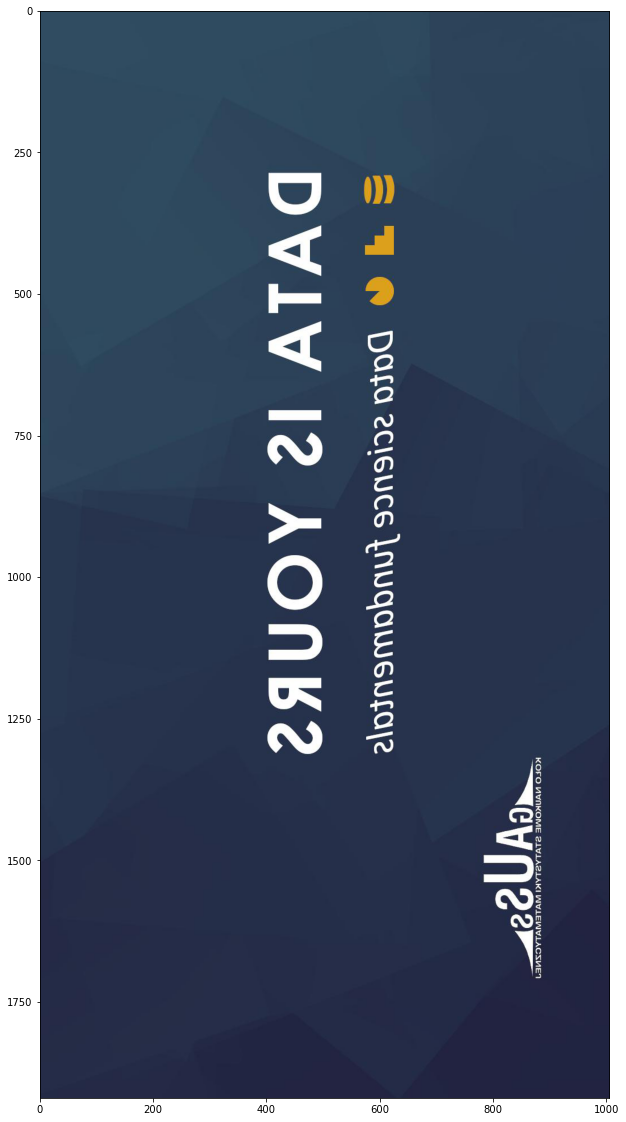

In [99]:
plt.imshow(transposed_image)

![reshape](media\reshape.webp)

In [150]:
reshaped_image = image_array.reshape(-1, image_array.shape[1] * 3, 3)
reshaped_image.shape

(335, 5760, 3)

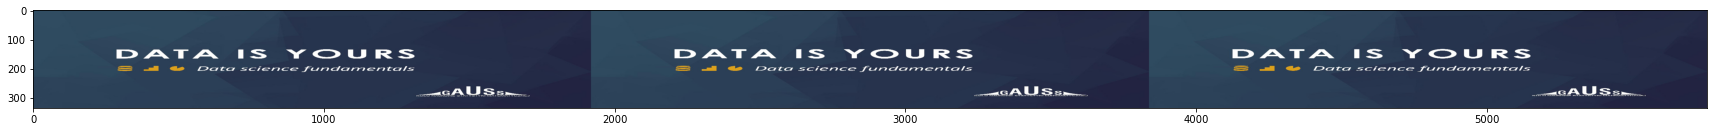

In [151]:
plt.imshow(reshaped_image)

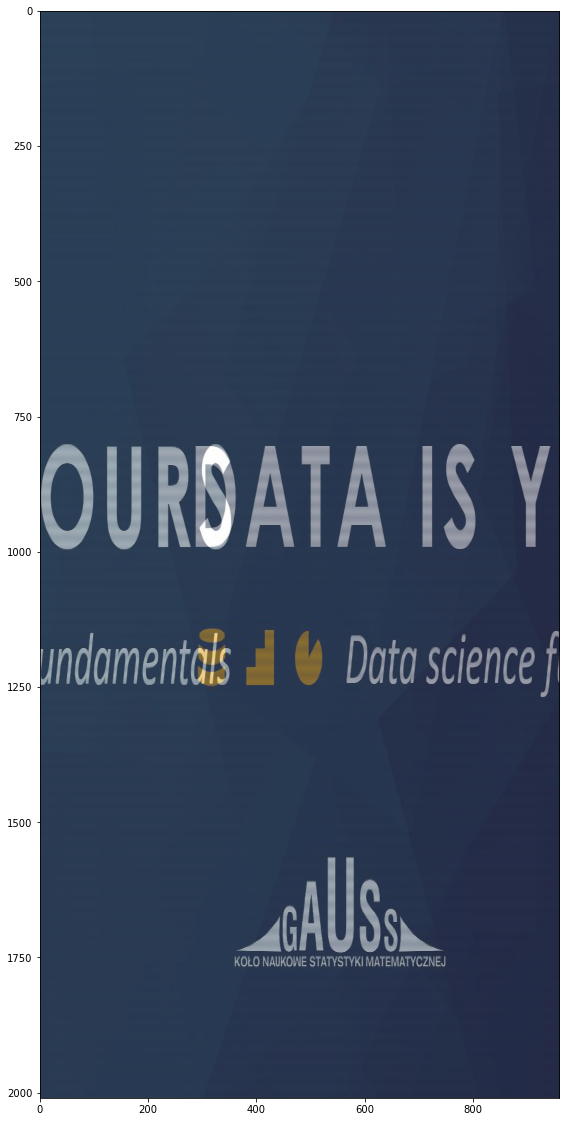

In [152]:
reshaped_image = image_array.reshape(2 * image_array.shape[0], -1, 3)
plt.imshow(reshaped_image)

In [2]:
A = np.arange(5)
A.shape, A.reshape(-1, 1).shape

((5,), (5, 1))

In [8]:
A.reshape(-1, 1) @ A.reshape(1, -1)

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12],
       [ 0,  4,  8, 12, 16]])

In [163]:
A * A.reshape(-1, 1)

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12],
       [ 0,  4,  8, 12, 16]])

In [164]:
flat = image_array.flatten()
flat.shape, image_array.size

((5788800,), 5788800)

## Slicing

In [69]:
image_array.shape

(1005, 1920, 3)

In [167]:
grayscale = image_array.mean(axis=-1)
grayscale.shape

(1005, 1920)

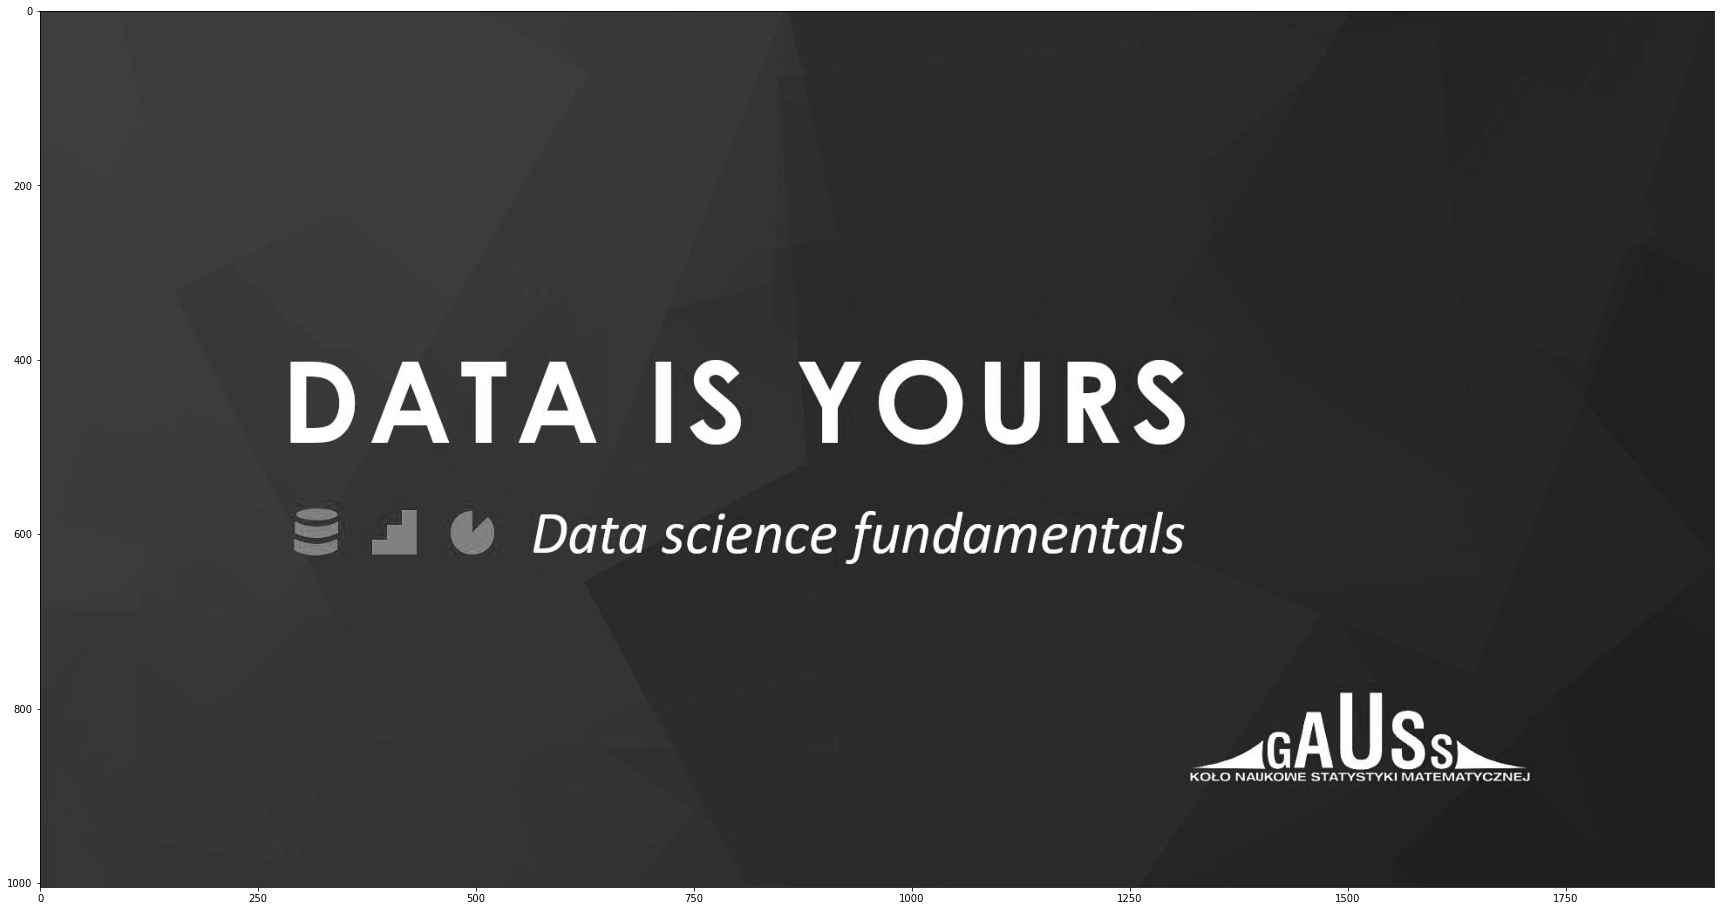

In [168]:
plt.imshow(grayscale)

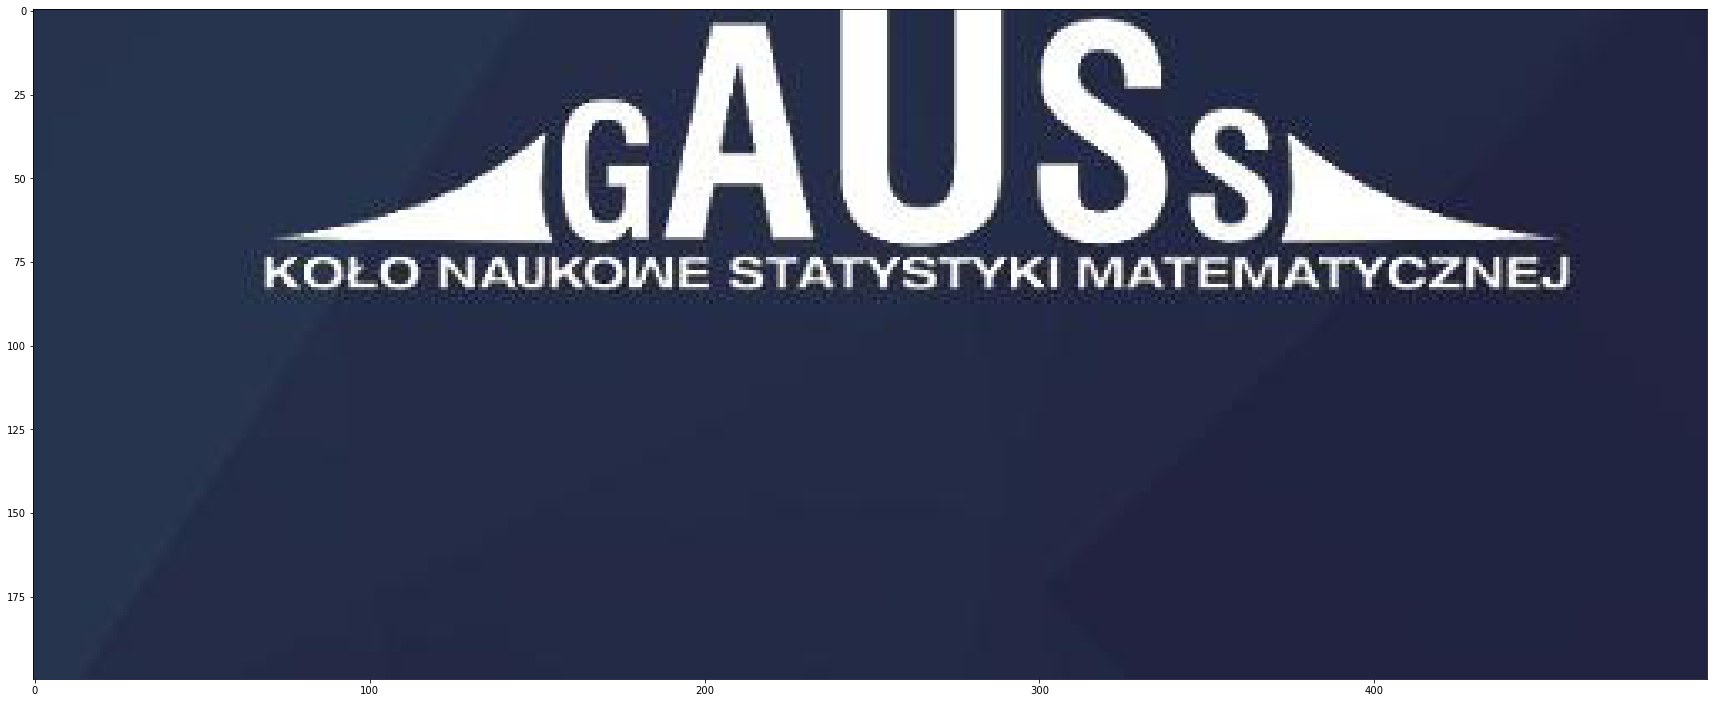

In [84]:
sub_image = image_array[800:1000, 1250:1750, :]
plt.imshow(sub_image)

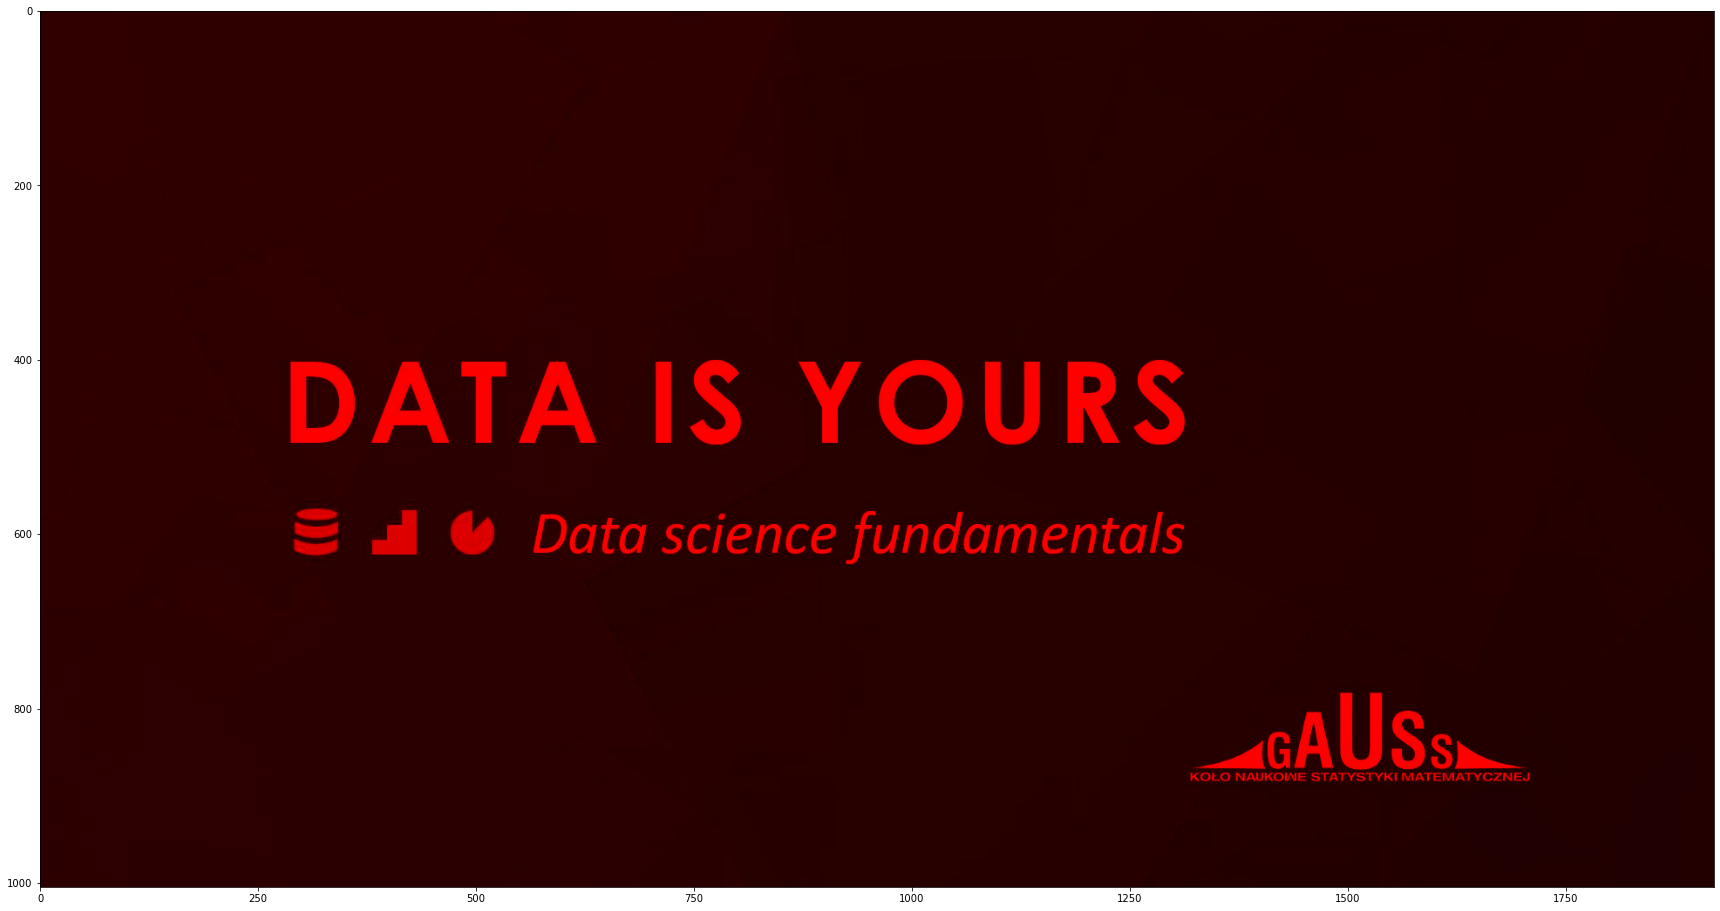

In [375]:
one_color = image_array.copy()
one_color[:, :, 1:] = 0
plt.imshow(one_color)

## Stacking

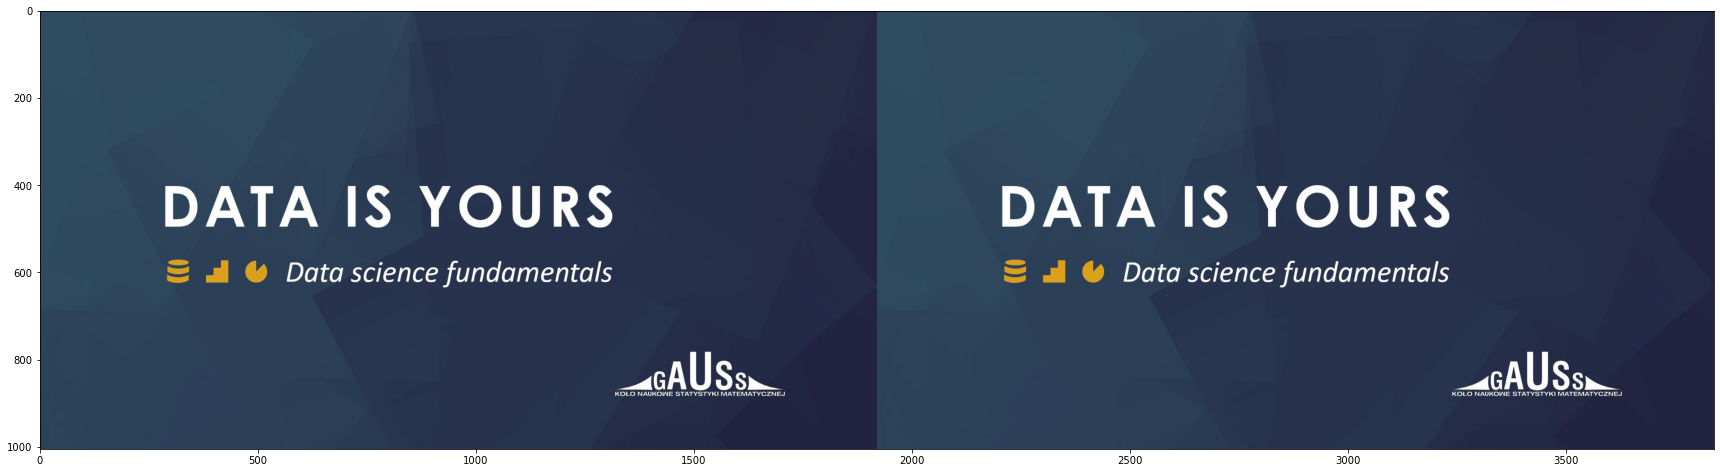

In [371]:
plt.imshow(np.hstack((image_array, image_array)))

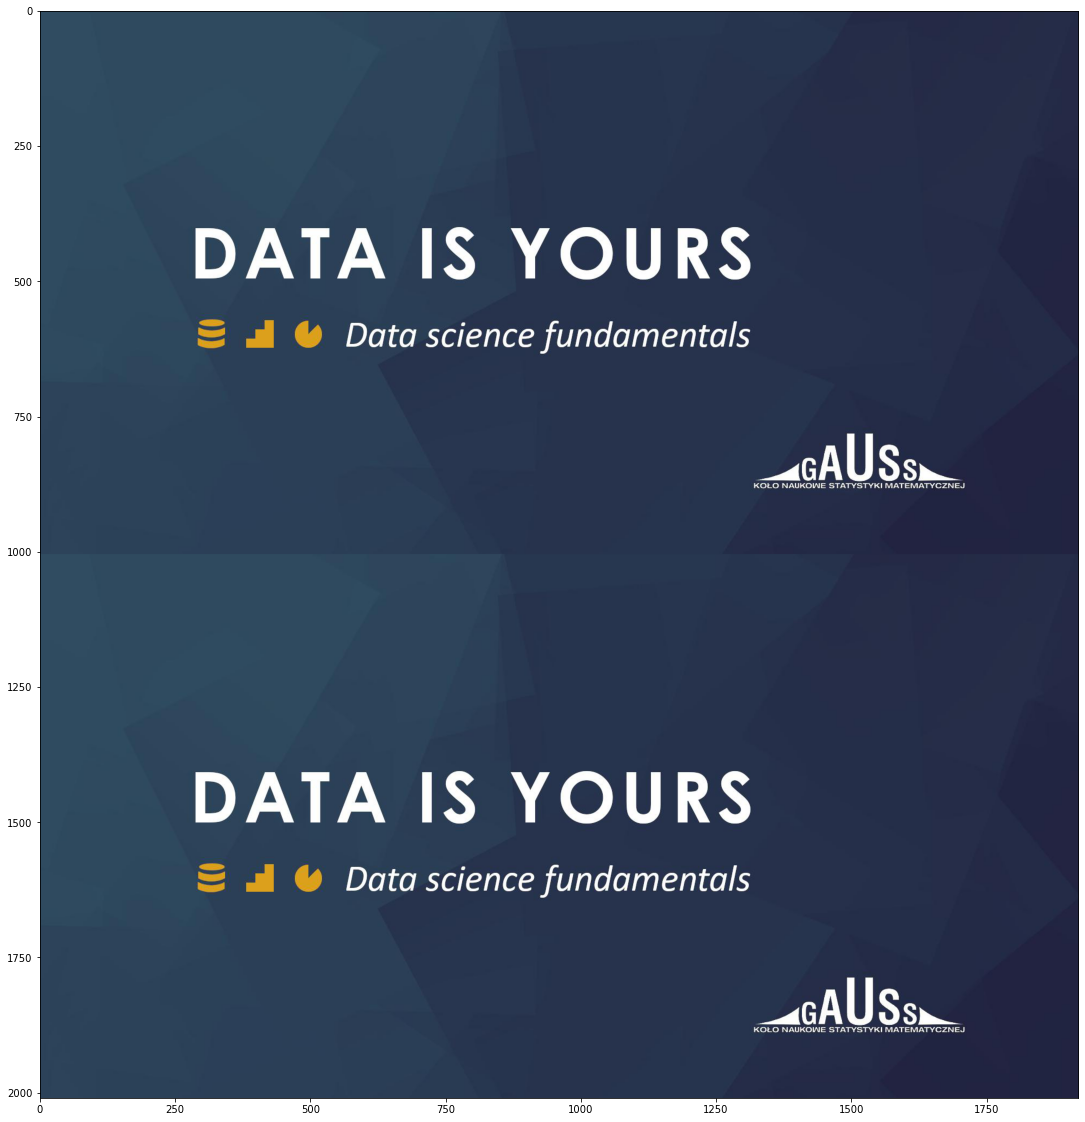

In [372]:
plt.imshow(np.vstack((image_array, image_array)))

## Masking

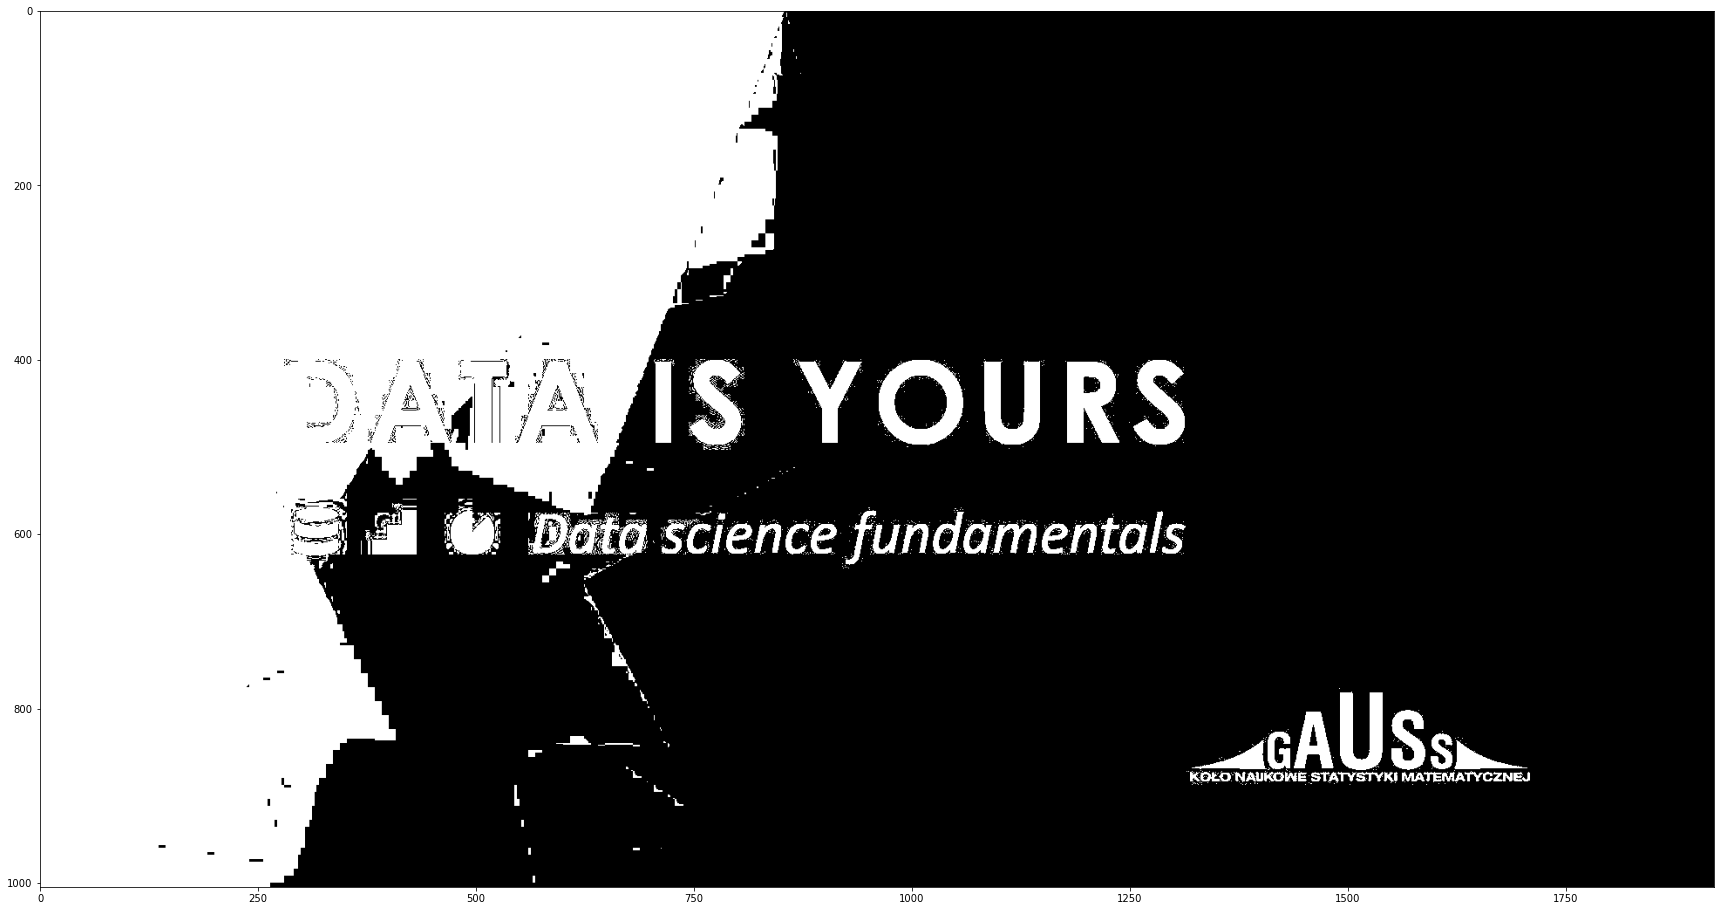

In [196]:
plt.imshow(grayscale > np.mean(grayscale))

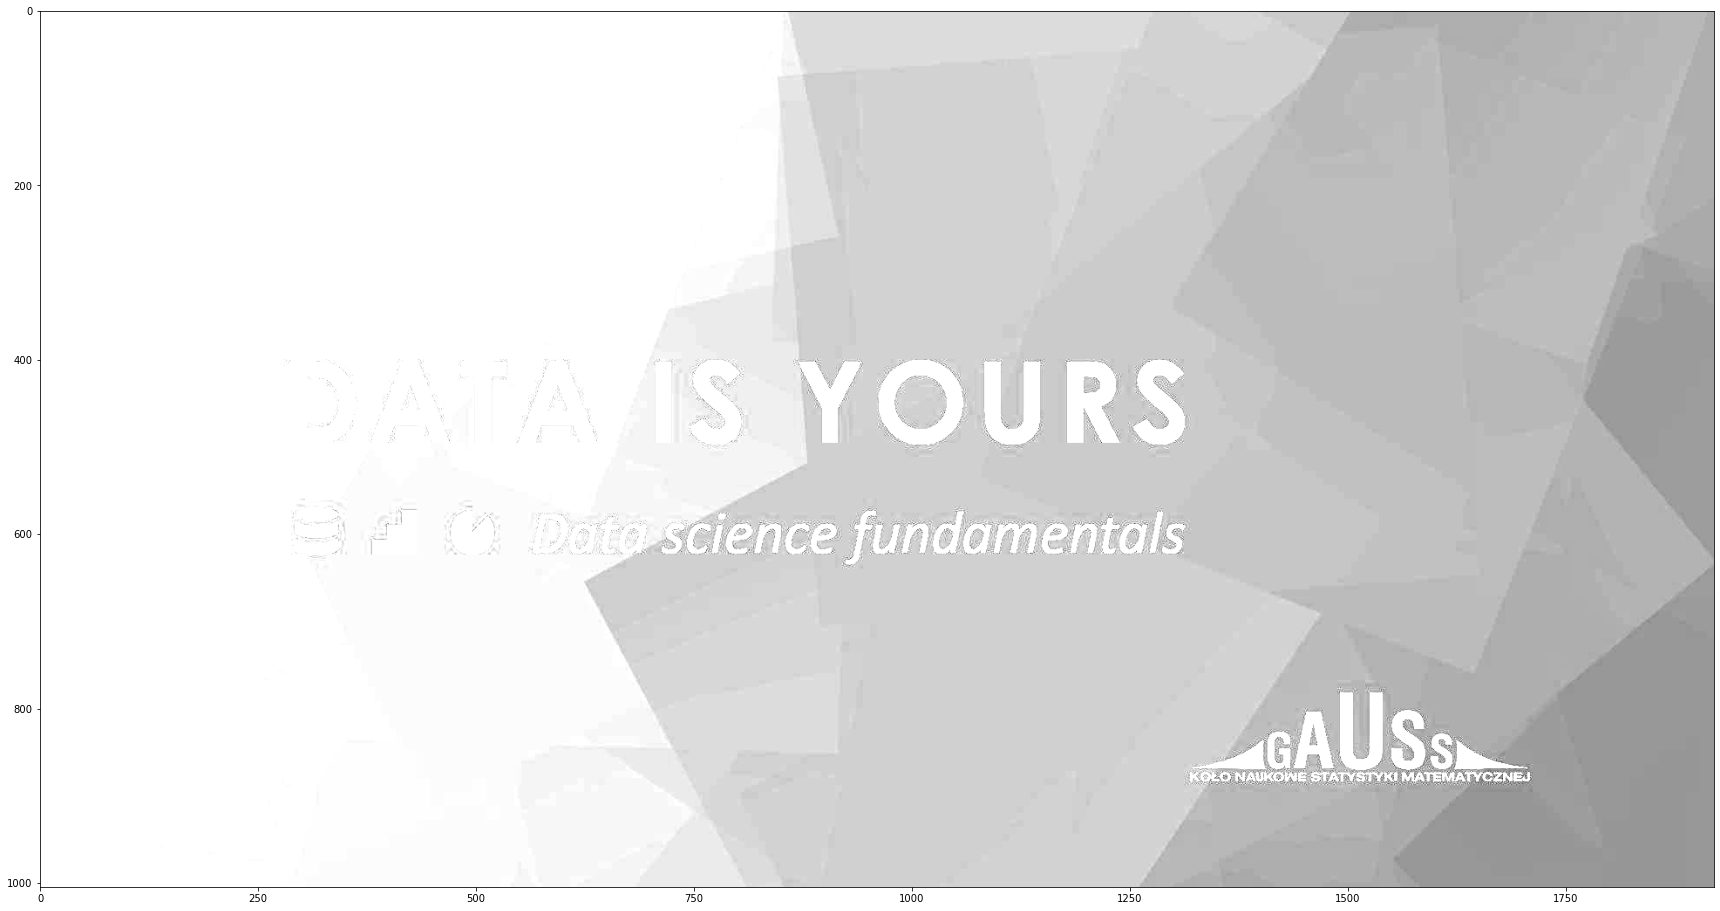

In [197]:
limited_image = grayscale.copy()
limited_image[limited_image > np.mean(limited_image)] = np.mean(limited_image)
plt.imshow(limited_image)

#### Exercise: Estimate $\pi$

In [247]:
n = 10000
unit = np.linspace(-1, 1, n)

In [248]:
radii = unit ** 2 + unit.reshape(-1, 1) ** 2

In [249]:
radii[radii < 1].size / radii.size * 4

3.1409544

# Computation

## Basic Operations

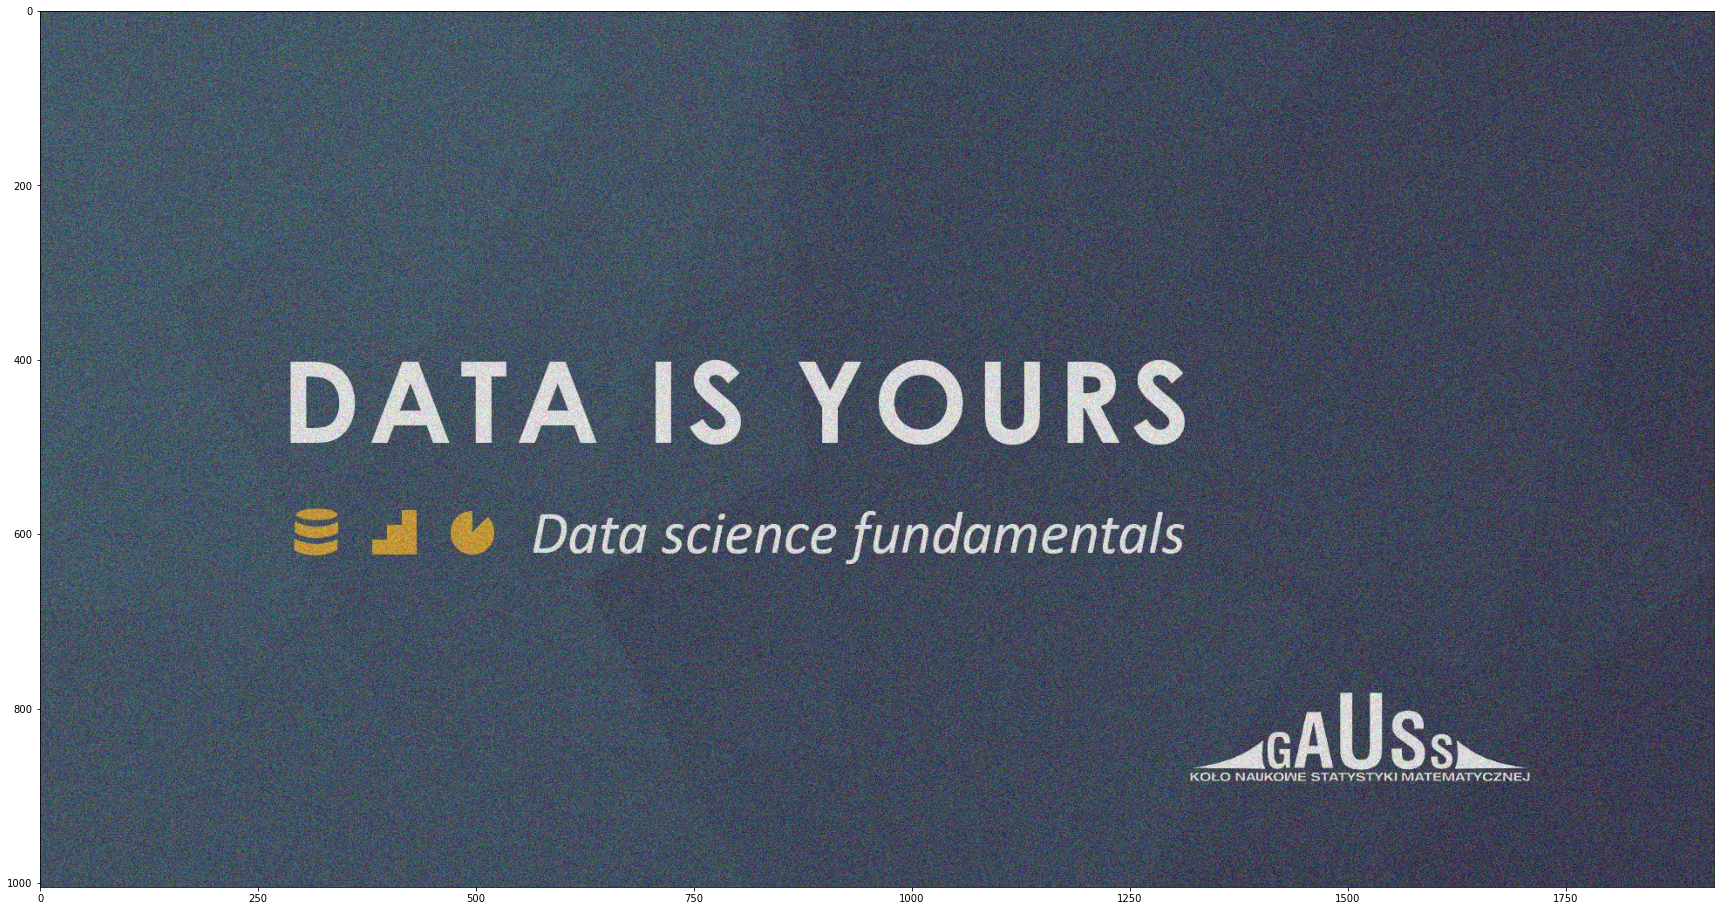

In [206]:
noised = image_array + np.random.uniform(0, 100, image_array.shape)
plt.imshow(min_max(noised))

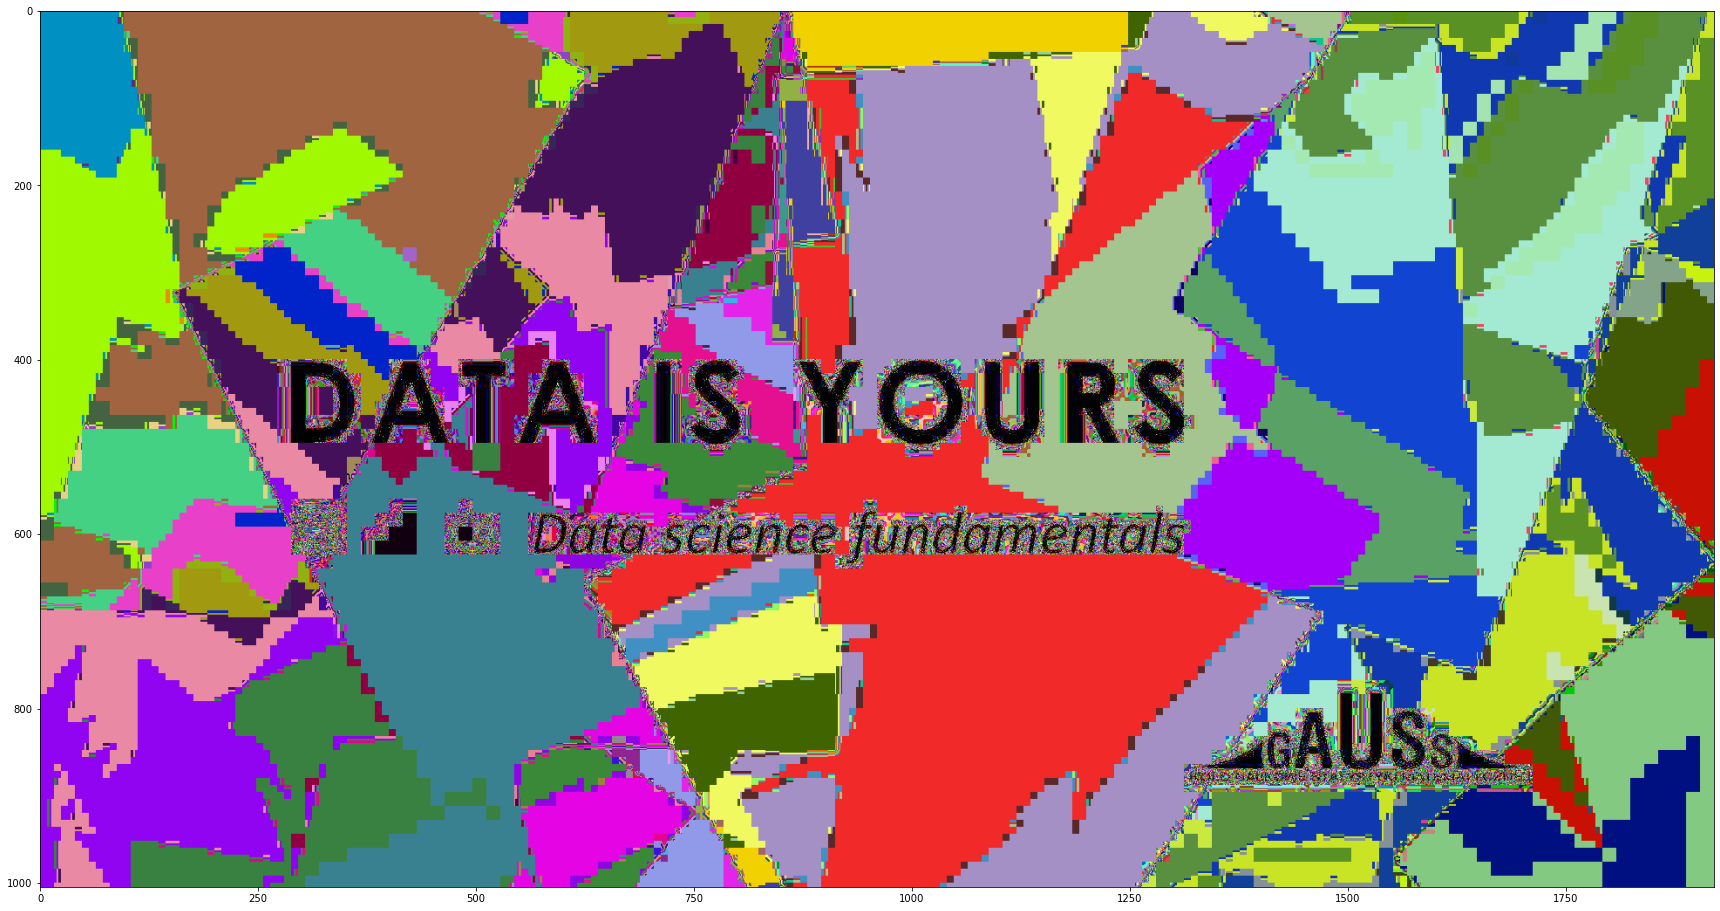

In [214]:
plt.imshow(image_array ** 2)

## Functions

In [ ]:
x = np.ones(3)
np.sqrt(x @ x.T)

$$g(x)=\frac{1}{\sigma\sqrt{2\,\pi}}\exp^{-\frac{x}{2\,\sigma^2}}$$

In [274]:
n = 10
unit = np.linspace(-1, 1, n)
radii = unit ** 2 + unit.reshape(-1, 1) ** 2

In [275]:
gaussian = 1 / np.sqrt(2 * np.pi) * np.exp(-radii / 2)

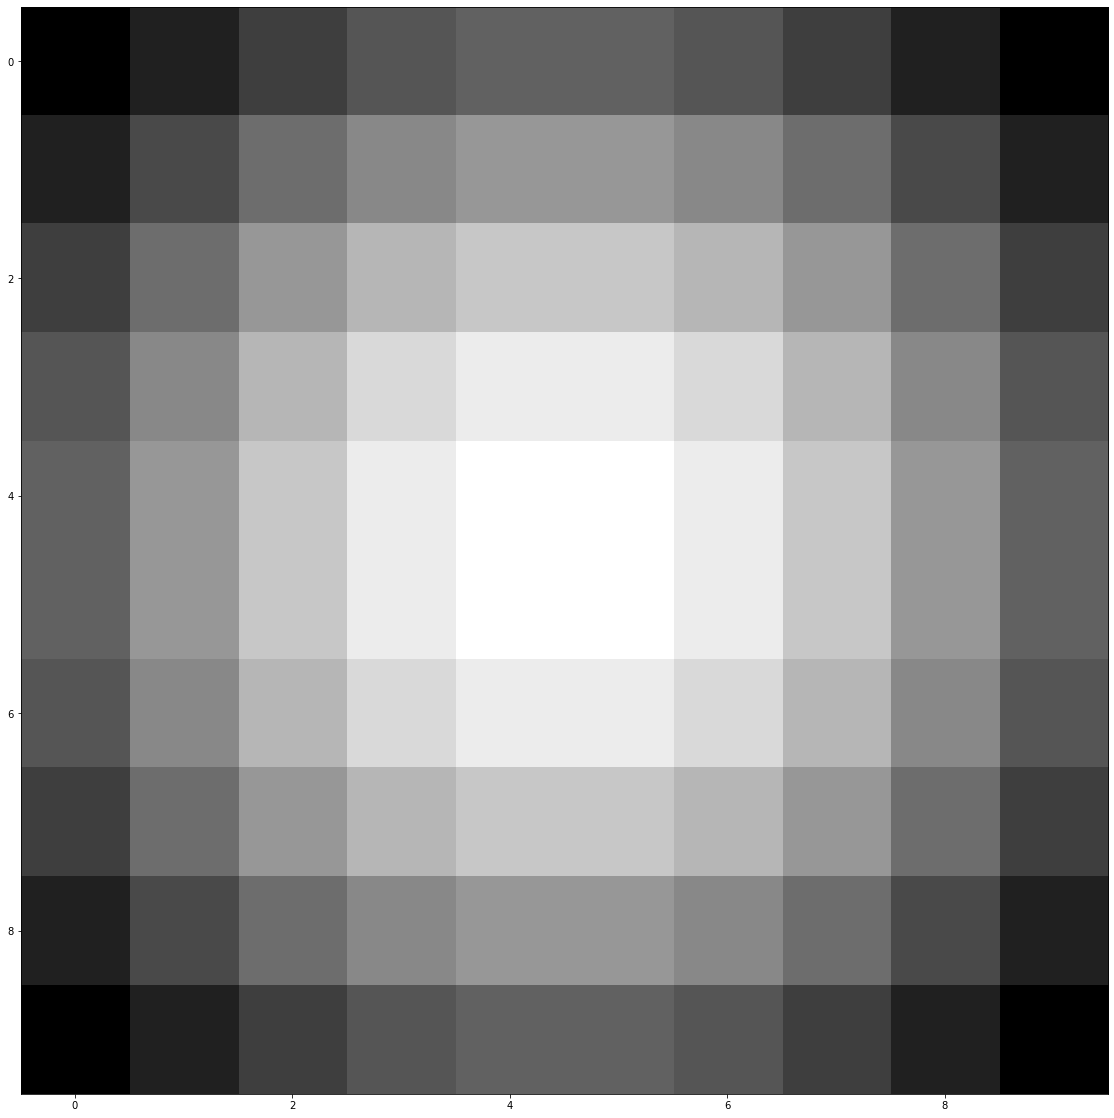

In [276]:
plt.imshow(gaussian)

## Statistics

In [257]:
sample = np.random.randn(1000)
np.mean(sample), np.std(sample), np.median(sample)

(-0.03865598027815658, 0.977932969426038, -0.031504704341237665)

In [259]:
sample_2d = np.random.randn(10, 100)
np.mean(sample_2d, axis=1)

array([-0.12491359,  0.00852931,  0.07454991,  0.1154998 , -0.08798109,
        0.05914461,  0.03056007,  0.08971628,  0.04914501, -0.04102285])

## Handling NaNs

In [228]:
sample_nan = np.random.randn(1000)
sample_nan[0] = np.nan
np.mean(sample_nan), np.std(sample_nan), np.median(sample_nan)

(nan, nan, nan)

In [229]:
np.nanmean(sample_nan), np.nanstd(sample_nan), np.nanmedian(sample_nan)

(0.022223954924583948, 1.0275871521595255, -0.010215264821699873)

#### Exercise: Smooth image using convolution

![convolution](media\convolution.png)

In [263]:
one_pixel = lambda sub, kernel: sum(np.diag(sub @ kernel)) / sub.size

In [277]:
sub_height, sub_width = gaussian.shape
height, width = grayscale.shape

smooth = np.array([[one_pixel(grayscale[i-sub_height:i, j-sub_width:j], gaussian) for j in range(sub_width, width)] 
                                                                                  for i in range(sub_height, height)])

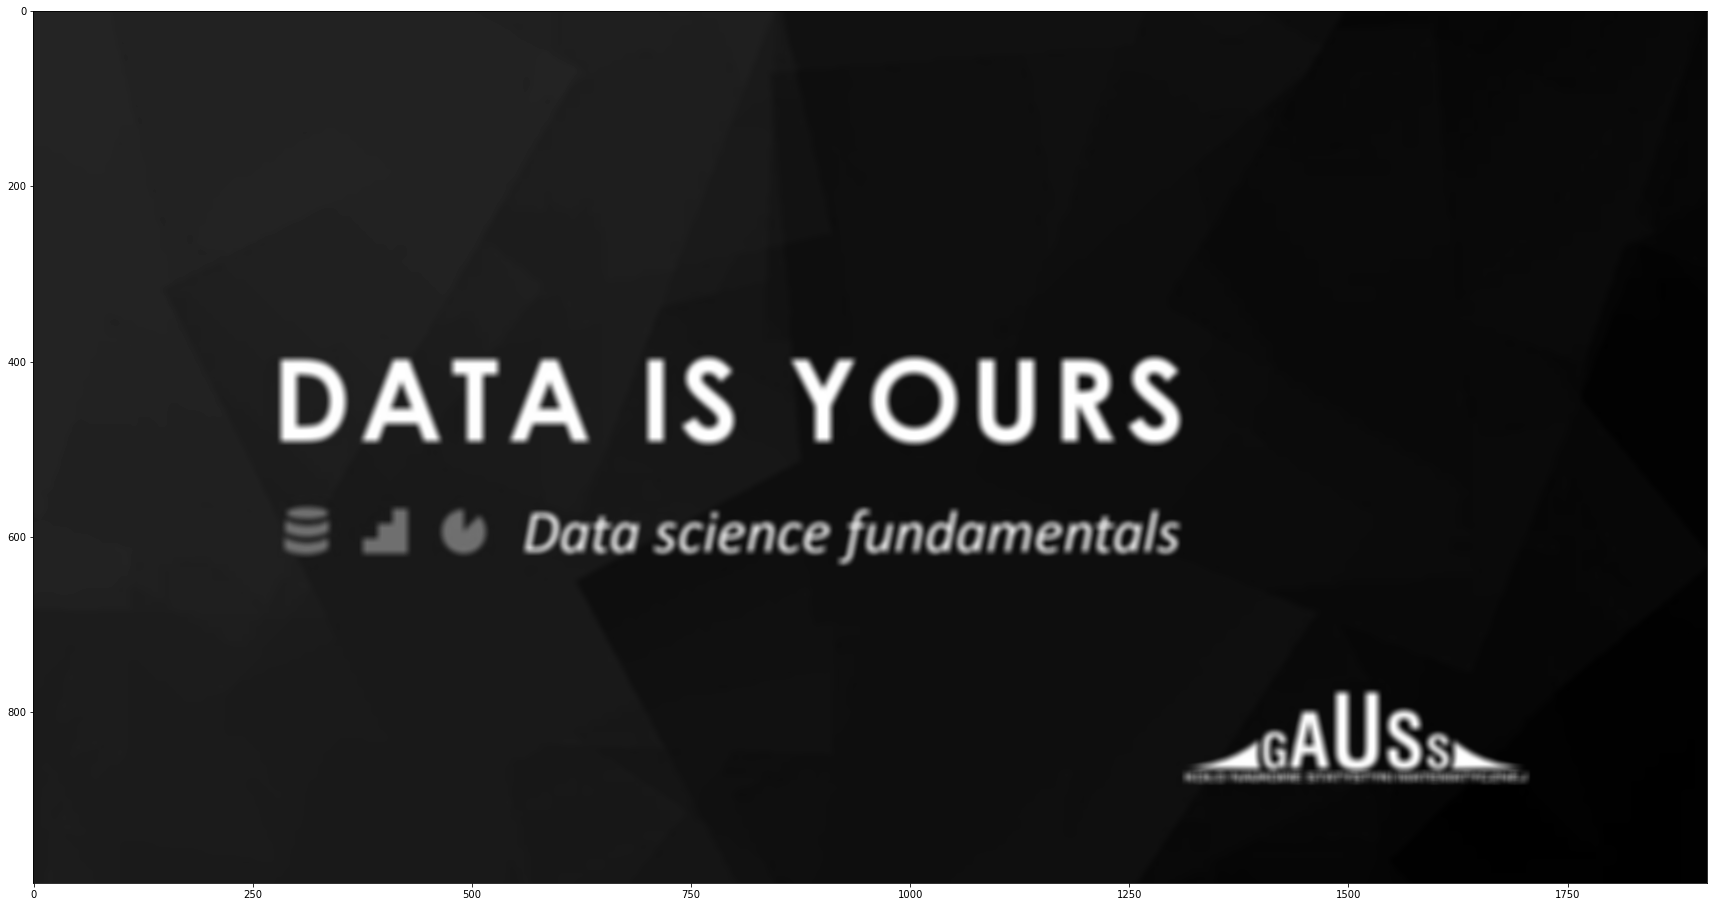

In [278]:
plt.imshow(smooth)

# Linear Algebra

In [280]:
np.linalg.norm(np.ones(3))

1.7320508075688772

$$\begin{cases}
a_{11}x_1+a_{12}x_2+\cdots+a_{1n}&=y_1\\
a_{21}x_1+a_{22}x_2+\cdots+a_{2n}&=y_2\\
\vdots&\vdots\\
a_{n1}x_1+a_{n2}x_2+\cdots+a_{nn}&=y_n\\
\end{cases}$$

$$Ax=y\Rightarrow x=A^{-1}y$$

In [281]:
A = np.random.randn(3, 3)
y = np.random.randn(3)

In [282]:
np.linalg.inv(A) @ y

array([-1.18331231, -0.49764074,  0.31750738])

In [283]:
np.linalg.solve(A, y)

array([-1.18331231, -0.49764074,  0.31750738])

$$A=Q\Lambda Q^{-1}$$\\
$$\Lambda=\begin{bmatrix}\lambda_1&0&\cdots&0\\0&\lambda_2&\cdots&0\\\vdots&\vdots&\ddots&0\\0&0&\cdots&\lambda_n\end{bmatrix}$$

In [286]:
eig_val, eig_vec = np.linalg.eig(A)

In [289]:
np.linalg.norm(eig_vec @ np.diag(eig_val) @ np.linalg.inv(eig_vec) - A)

2.7875205828654184e-15

# Broadcast

In [11]:
relu = lambda x: max(0, x)
relu(np.arange(-10, 10))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [297]:
relu_vec = np.vectorize(relu)
relu_vec(np.arange(-10, 10))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [309]:
relu_vec(np.random.randn(10, 10))

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
       [0, 1, 1, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 2, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [322]:
np.diff(np.arange(10))

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [326]:
np.apply_along_axis(np.diff, 1, np.array([np.arange(0, i * 5, i) for i in range(1, 4)]))

array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [365]:
powers = lambda x, power: np.array([x ** p for p in range(power)])
vec_pow = lambda x, power: np.vectorize(lambda y: powers(y, power), signature='()->(n)')(x)
vec_pow(np.arange(1, 5), 4)

array([[ 1,  1,  1,  1],
       [ 1,  2,  4,  8],
       [ 1,  3,  9, 27],
       [ 1,  4, 16, 64]])

#### Exercise: Create red-to-blue gradient

In [364]:
row = lambda i: np.ones(256) * i
grad = np.vectorize(row, signature='()->(n)')(np.arange(256))
grad

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.],
       [  2.,   2.,   2., ...,   2.,   2.,   2.],
       ...,
       [253., 253., 253., ..., 253., 253., 253.],
       [254., 254., 254., ..., 254., 254., 254.],
       [255., 255., 255., ..., 255., 255., 255.]])

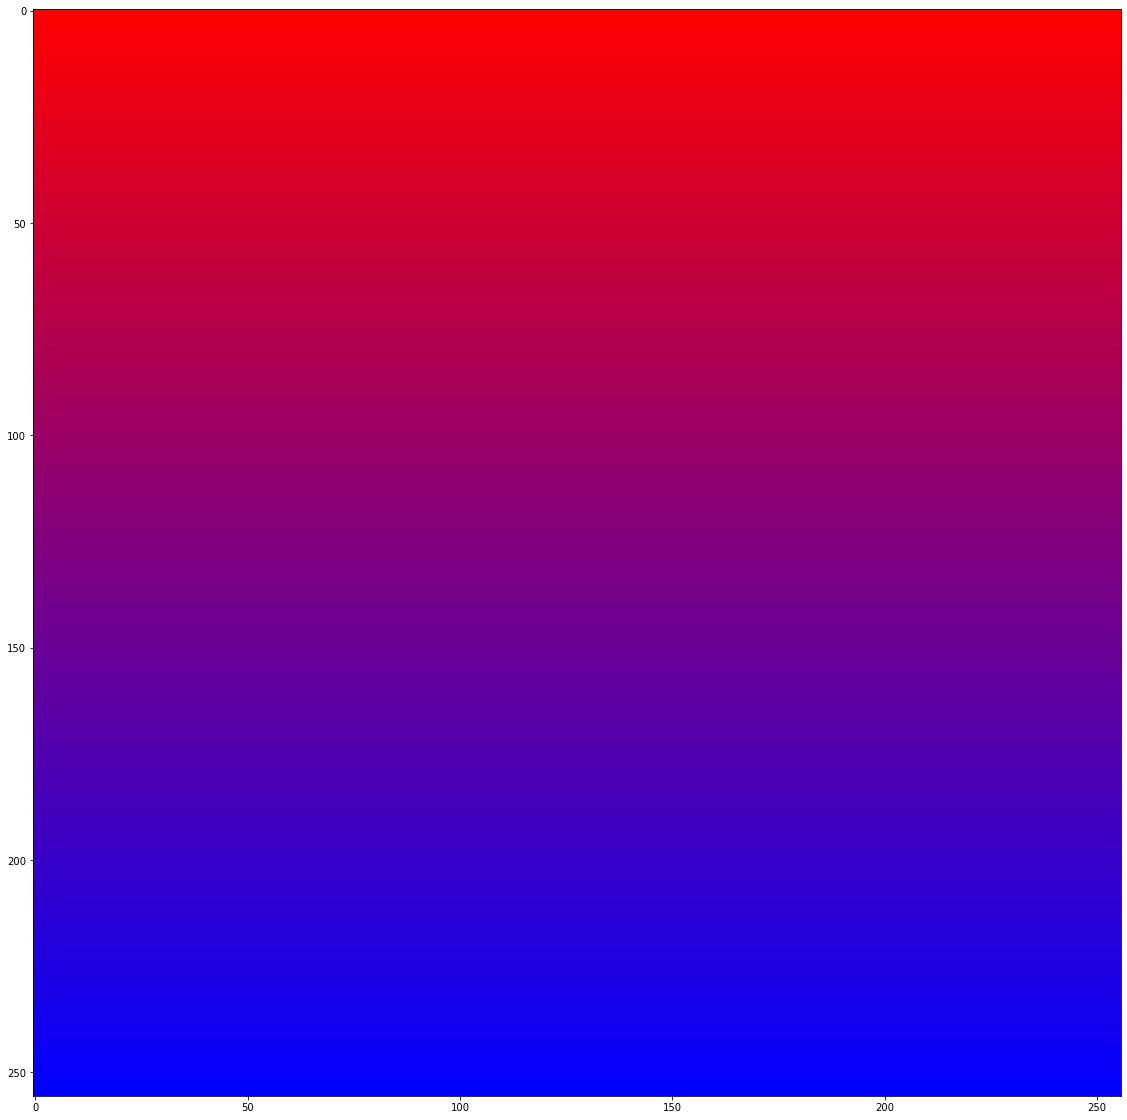

In [370]:
color = lambda value: np.array([255 - value, 0, value])
plt.imshow(np.vectorize(color, signature='()->(n)')(grad).astype(int))